In [2]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
import pandas as pd
df = pd.read_csv(r'C:\Users\MANICKA MEENAKSHI.S\Downloads\archive (9)\English Sarcasm.csv', encoding='latin1')
df['Tweet'] = df['Tweet'].astype(str)

In [4]:

df['Tweet'] = df['Tweet'].fillna('')
df['Tweeted'] = df['Tweet'].astype(str)
print(df['Tweeted'].head())


0    I love finding out who your true friends are. ...
1                                          USER :/ bye
2            USER I absolutely love Kanye's voice USER
3    We're hiring a new Kiosk Supervisor! Think you...
4    Every time I see Dave Grohl with his long hipp...
Name: Tweeted, dtype: object


In [5]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\b\w{1,2}\b', '', text) 
    text = re.sub(r'[^\w\s]', '', text) 
    text = re.sub(r'\s+', ' ', text).strip() 
    return text
df['Tweeted'] = df['Tweet'].apply(clean_text)


In [6]:
df = df.drop('Tweet', axis=1)

In [7]:
print(df['Label'].value_counts())

Label
0    3553
1    1000
Name: count, dtype: int64


Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - accuracy: 0.4962 - loss: 0.6945 - val_accuracy: 0.6684 - val_loss: 0.6683
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.7093 - loss: 0.5880 - val_accuracy: 0.7845 - val_loss: 0.4685
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.8292 - loss: 0.4028 - val_accuracy: 0.8162 - val_loss: 0.4259
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.9126 - loss: 0.2469 - val_accuracy: 0.8223 - val_loss: 0.4228
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.9507 - loss: 0.1713 - val_accuracy: 0.7977 - val_loss: 0.6536
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9612 - loss: 0.1173 - val_accuracy: 0.8179 - val_loss: 0.7622
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.9772 - loss: 0.0729 - val_accuracy: 0.8215 - val_loss: 0.8666
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.9808 - loss: 0.0592 - val_acc

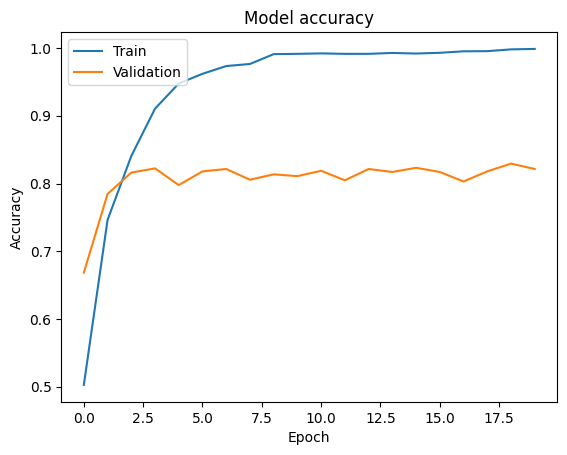

In [13]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, LSTM, Dropout, Dense
import matplotlib.pyplot as plt
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])
df['Tweeted'] = df['Tweeted'].astype(str)
max_length = 100  
vocab_size = 1000  
embedding_dim = 50
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df['Tweeted'])
sequences = tokenizer.texts_to_sequences(df['Tweeted'])
X = pad_sequences(sequences, maxlen=max_length)
y = df['Label'].values
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
input_layer = Input(shape=(max_length,))
x = Embedding(vocab_size, embedding_dim)(input_layer)
x = Conv1D(64, 5, activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = LSTM(64, return_sequences=True)(x) 
x = Dropout(0.5)(x)


x = LSTM(64)(x)
x = Dropout(0.5)(x)


x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

output_layer = Dense(len(label_encoder.classes_), activation='softmax')(x)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [14]:
model.save('Sentiment_model.h5')  
# OR
model.save('Sentiment_model.keras')

In [20]:
df['Label'].unique()

array([0, 1], dtype=int64)

In [23]:
model.save("Sarcasm.h5")